In [ ]:
!pip install langdetect

     |████████████████████████████████| 983kB 8.2MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993194 sha256=c1c7de001ac61057df400f48ceee3352e4b2eb0c3bb773569ce03038344c7f05
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [ ]:
!pip install geotext

     |████████████████████████████████| 2.0MB 9.2MB/s 


In [ ]:
import pandas as pd
import pickle
from matplotlib import pyplot as plt 
from langdetect import detect

In [ ]:
with open("Results.pkl","rb") as f:
    data = pickle.load(f)

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df['Lang'] = df['text'].apply(lambda x: detect(x))

In [ ]:
df = df[df["Lang"] == 'en']
df = df[~df['text'].str.contains('RightAIFuture')]

In [ ]:
pd.value_counts(df["screen_username"])

ceobillionaire    333
Montreal_AI       314
Quebec_AI         241
IntelligenceTV    138
luislamb          116
                 ... 
pistolsout          1
ZenMorin            1
Neurosciencenw      1
Zaahaaaar           1
JMU2012             1
Name: screen_username, Length: 1397, dtype: int64

In [ ]:
df = df[df["screen_username"]!="ceobillionaire"]
df = df[df["screen_username"]!="Montreal_AI"]
df = df[df["screen_username"]!="Quebec_AI"]

In [ ]:
df.reset_index(inplace=True,drop=True)

In [ ]:
x = df["location"].values

In [ ]:
from geotext import GeoText

In [ ]:
y = GeoText("Kolkata")

In [ ]:
x = [y for y in x if y!=None]

In [ ]:
len(x)

2101

In [ ]:
text = " | ".join(x)

In [ ]:
y = GeoText(text)

In [ ]:
mapping = y.index.countries

In [ ]:
map_rev = {x:y for y,x in mapping.items()}

In [ ]:
z= y.country_mentions

In [ ]:
new_dict = {map_rev[a]:b for a,b in z.items()}

In [ ]:
df[~df['text'].str.contains('RightAIFuture')]

In [ ]:
df['text'].str.lower().str.contains('symbolic')

0       False
1       False
2       False
3       False
4       False
        ...  
2740    False
2741    False
2742     True
2743     True
2744    False
Name: text, Length: 2745, dtype: bool

In [ ]:
dfekman = df["ekman"].apply(pd.Series)

In [ ]:
dfekman.columns = ["ekman_"+x for x in dfekman.columns]

In [ ]:
dfplutchik = df["plutchik"].apply(pd.Series)
dfplutchik.columns = ["plutchik_"+x for x in dfplutchik.columns]

In [ ]:
dfpoms = df["poms"].apply(pd.Series)
dfpoms.columns = ["poms_"+x for x in dfpoms.columns]

In [ ]:
df_new = pd.concat([df, dfekman], axis = 1)
df_new = pd.concat([df_new, dfplutchik], axis = 1)
df_new = pd.concat([df_new, dfpoms], axis = 1)


In [ ]:
df_new.head()

,id,user_id,user_name,screen_username,followers,follows,location,retweets,likes,time_creation,names,replies,text,ekman,plutchik,poms,Lang,ekman_Anger,ekman_Disgust,ekman_Fear,ekman_Joy,ekman_Sadness,ekman_Surprise,plutchik_Anger,plutchik_Disgust,plutchik_Fear,plutchik_Joy,plutchik_Sadness,plutchik_Surprise,plutchik_Trust,plutchik_Anticipation,poms_Anger,poms_Depression,poms_Fatigue,poms_Vigour,poms_Tension,poms_Confusion
0,1345465866708606976,1964009738,BrainBlender🤔🌐,BrainBlenderTec,2594,1499,None,0,0,2021-01-02 20:23:54,"[{'screen_name': 'Montreal_AI', 'name': 'MONTR...",0,AI DEBATE 3\n\nBy: https://t.co/VaMGbOjQ11\n\n...,"{'Anger': 0.004034789, 'Disgust': 0.012270186,...","{'Anger': 8.768835e-05, 'Disgust': 0.000169608...","{'Anger': 4.7939427e-08, 'Depression': 2.90681...",en,0.004035,0.012270,0.408956,0.199015,0.117820,0.257903,0.000088,0.000170,0.007450,0.003164,0.002563,0.003419,0.028445,0.954701,4.793943e-08,0.000029,0.583892,0.415885,0.000193,2.151424e-07
1,1345465437706969093,19989030,Luis Lamb,luislamb,1839,1730,"Porto Alegre, Brazil",0,0,2021-01-02 20:22:12,"[{'screen_name': 'Montreal_AI', 'name': 'MONTR...",0,"""Leading computer scientists debate the next s...","{'Anger': 6.296762e-05, 'Disgust': 1.1265375e-...","{'Anger': 8.842684e-05, 'Disgust': 1.9328957e-...","{'Anger': 0.00017228695, 'Depression': 0.99953...",en,0.000063,0.000001,0.003538,0.996074,0.000119,0.000206,0.000088,0.000002,0.004995,0.986106,0.000192,0.000334,0.008269,0.000013,1.722869e-04,0.999539,0.000018,0.000010,0.000250,1.096110e-05
2,1345434356244996096,946139024,Catriona Kennedy,CatMKennedy,728,1401,"Manchester, UK",0,0,2021-01-02 18:18:42,"[{'screen_name': 'Montreal_AI', 'name': 'MONTR...",0,"AI DEBATE 2\n\n""It takes a village to raise an...","{'Anger': 0.18170805, 'Disgust': 0.009929685, ...","{'Anger': 0.0031134335, 'Disgust': 0.000113043...","{'Anger': 1.6765523e-05, 'Depression': 4.79730...",en,0.181708,0.009930,0.292231,0.226576,0.002987,0.286568,0.003113,0.000113,0.003762,0.002110,0.000028,0.005000,0.985134,0.000739,1.676552e-05,0.000005,0.000011,0.999543,0.000403,2.274239e-05
3,1345352864944840705,293044686,Dinorego Bauba Mphogo,mphogo_dinorego,100,772,"Johannesburg, South Africa",0,0,2021-01-02 12:54:53,"[{'screen_name': 'Montreal_AI', 'name': 'MONTR...",0,AI DEBATE 2: Rich Sutton’s Remark @AmiiThinks\...,"{'Anger': 0.027601732, 'Disgust': 0.005404229,...","{'Anger': 0.026196506, 'Disgust': 0.0058080936...","{'Anger': 0.192584, 'Depression': 0.6272554, '...",en,0.027602,0.005404,0.715256,0.237786,0.004283,0.009669,0.026197,0.005808,0.536733,0.150298,0.003579,0.008629,0.258727,0.010030,1.925840e-01,0.627255,0.000126,0.007133,0.054430,1.184716e-01
4,1345267670644625408,395150986,Fastwind,Wind_Xiaoli,51,316,None,0,0,2021-01-02 07:16:21,"[{'screen_name': 'Montreal_AI', 'name': 'MONTR...",0,AI DEBATE 2: Rich Sutton’s Remark @AmiiThinks\...,"{'Anger': 0.027601732, 'Disgust': 0.005404229,...","{'Anger': 0.026196506, 'Disgust': 0.0058080936...","{'Anger': 0.192584, 'Depression': 0.6272554, '...",en,0.027602,0.005404,0.715256,0.237786,0.004283,0.009669,0.026197,0.005808,0.536733,0.150298,0.003579,0.008629,0.258727,0.010030,1.925840e-01,0.627255,0.000126,0.007133,0.054430,1.184716e-01


In [ ]:

# standardize the time
df_new['date'] = pd.to_datetime(df_new['time_creation'], format='%Y-%m-%d %H:%M:%S').dt.date

In [ ]:
df_new = df_new.sort_values(by='date')

In [ ]:
df_new.head()

,id,user_id,user_name,screen_username,followers,follows,location,retweets,likes,time_creation,names,replies,text,ekman,plutchik,poms,Lang,ekman_Anger,ekman_Disgust,ekman_Fear,ekman_Joy,ekman_Sadness,ekman_Surprise,plutchik_Anger,plutchik_Disgust,plutchik_Fear,plutchik_Joy,plutchik_Sadness,plutchik_Surprise,plutchik_Trust,plutchik_Anticipation,poms_Anger,poms_Depression,poms_Fatigue,poms_Vigour,poms_Tension,poms_Confusion,date
2737,1338300230068998149,298704683,Andreas Staub,andi_staub,60596,7950,None,0,0,2020-12-14 01:50:13,"[{'screen_name': 'andi_staub', 'name': 'Andrea...",0,A Curious Theory About the Consciousness Debat...,"{'Anger': 0.0076080277, 'Disgust': 0.002958448...","{'Anger': 0.0053252345, 'Disgust': 0.002136733...","{'Anger': 0.283853, 'Depression': 0.26479363, ...",en,0.007608,0.002958,0.113809,0.839577,0.010787,0.025261,0.005325,0.002137,0.061542,0.423633,0.005304,0.014904,0.477901,0.009254,0.283853,0.264794,0.009453,0.002695,0.004659,0.434547,2020-12-14
2660,1338553504302944261,959498148182876161,Sean O’Brien,SeanOBr83726519,15,150,"Santa Clarita, CA",0,0,2020-12-14 18:36:39,"[{'screen_name': 'hardmaru', 'name': 'hardmaru...",0,@hardmaru The *goal* is one thing—more interes...,"{'Anger': 0.003764875, 'Disgust': 0.003989434,...","{'Anger': 0.0017267023, 'Disgust': 0.001933936...","{'Anger': 0.0055534756, 'Depression': 0.657081...",en,0.003765,0.003989,0.185636,0.778753,0.004768,0.023088,0.001727,0.001934,0.131081,0.461013,0.003078,0.022060,0.353057,0.026052,0.005553,0.657082,0.000003,0.000126,0.331068,0.006167,2020-12-14
2661,1338552964223545344,4374719908,Jean-Baptiste Lefevre #CES2021,jblefevre60,79387,5477,"Paris, France",0,0,2020-12-14 18:34:30,"[{'screen_name': 'ipfconline1', 'name': 'ipfco...",0,"Debate: Smile, you're under surveillance!\n\nh...","{'Anger': 0.024957374, 'Disgust': 0.015756218,...","{'Anger': 0.010081268, 'Disgust': 0.0070656333...","{'Anger': 0.051060278, 'Depression': 0.0388235...",en,0.024957,0.015756,0.344595,0.540956,0.020538,0.053197,0.010081,0.007066,0.148023,0.197682,0.011466,0.023242,0.292675,0.309766,0.051060,0.038824,0.736730,0.000037,0.160197,0.013152,2020-12-14
2663,1338551859192193026,705539763349164032,ipfconline #CES2021,ipfconline1,112596,106841,"Marseille, France",7,8,2020-12-14 18:30:06,"[{'screen_name': 'FlorenceRodhain', 'name': 'R...",0,"Debate: Smile, you're under surveillance!\n\nh...","{'Anger': 0.024957374, 'Disgust': 0.015756218,...","{'Anger': 0.010081268, 'Disgust': 0.0070656333...","{'Anger': 0.051060278, 'Depression': 0.0388235...",en,0.024957,0.015756,0.344595,0.540956,0.020538,0.053197,0.010081,0.007066,0.148023,0.197682,0.011466,0.023242,0.292675,0.309766,0.051060,0.038824,0.736730,0.000037,0.160197,0.013152,2020-12-14
2664,1338545557657309186,3345194367,JC Gaillard,Corix_JC,6432,6008,"London, England",2,1,2020-12-14 18:05:04,"[{'screen_name': 'jrdothoughts', 'name': 'Jesu...",0,A Curious Theory About the Consciousness Debat...,"{'Anger': 0.11455982, 'Disgust': 0.011682837, ...","{'Anger': 0.016867734, 'Disgust': 0.0021342398...","{'Anger': 0.018420449, 'Depression': 0.0667081...",en,0.114560,0.011683,0.594858,0.267995,0.001632,0.009272,0.016868,0.002134,0.076589,0.017677,0.000155,0.000842,0.884607,0.001128,0.018420,0.066708,0.031189,0.820907,0.001395,0.061380,2020-12-14


Ekman

            ekman_Anger  ekman_Disgust  ...  ekman_Sadness  ekman_Surprise
date                                    ...                               
2020-12-14    18.097369       4.226078  ...       3.601088       30.440249
2020-12-15    46.388522      21.005314  ...      46.382574       15.021609
2020-12-16    14.120932       1.245361  ...       3.698683       13.532246
2020-12-17     9.014748       9.916200  ...       3.667961        7.700071
2020-12-18    20.252231       8.603932  ...      13.758778       62.433991
2020-12-19     3.749604       6.474218  ...       3.757516       14.528707
2020-12-20     7.563787       1.903081  ...       3.691308       42.602470
2020-12-21     4.728596       1.389043  ...       5.002895       18.142253
2020-12-22     6.181670       2.693545  ...       1.562283       16.350760
2020-12-23   133.921701      19.997318  ...     106.143811      304.363245
2020-12-24   107.105307      40.890887  ...     118.574405      310.582421
2020-12-25     9.594158  

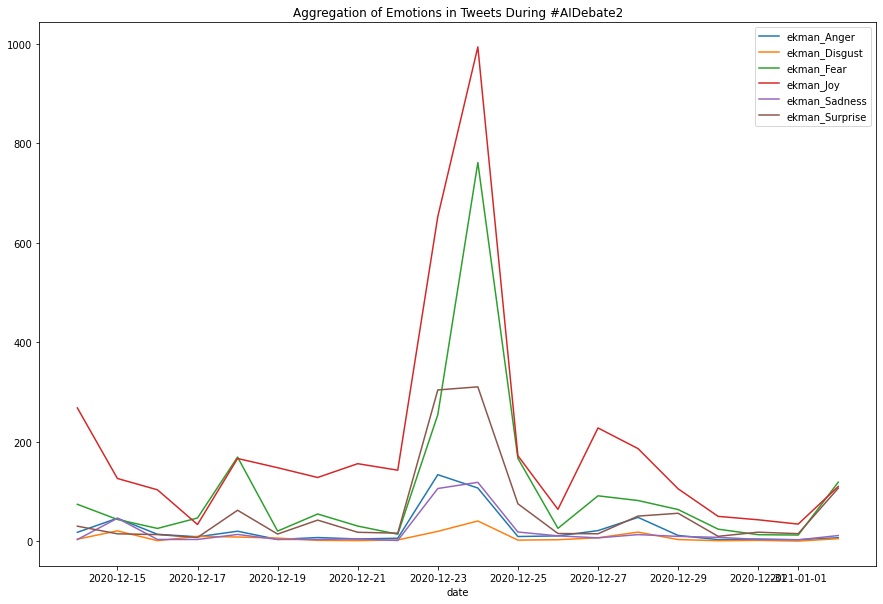

In [ ]:
df_temp = df_new.copy()
df_temp[['ekman_Anger', 'ekman_Disgust', 'ekman_Fear', 'ekman_Joy', 'ekman_Sadness', 'ekman_Surprise']] = df_new[['ekman_Anger', 'ekman_Disgust', 'ekman_Fear', 'ekman_Joy', 'ekman_Sadness', 'ekman_Surprise']].multiply(df_temp['likes']+1, axis = 'index')
df2 = df_temp[['date','ekman_Anger',
 'ekman_Disgust',
 'ekman_Fear',
 'ekman_Joy',
 'ekman_Sadness',
 'ekman_Surprise']]
df2.set_index('date')

df3 = df2.groupby(df2['date']).sum()

print(df3)


fig = df3.plot(y=['ekman_Anger',
 'ekman_Disgust',
 'ekman_Fear',
 'ekman_Joy',
 'ekman_Sadness',
 'ekman_Surprise'], figsize=(15,10), 
         title='Aggregation of Emotions in Tweets During #AIDebate2').get_figure()
fig.savefig('EKMAN.png')

Plutchik

In [ ]:
df_new.columns

Index(['id', 'user_id', 'user_name', 'screen_username', 'followers', 'follows',
       'location', 'retweets', 'likes', 'time_creation', 'names', 'replies',
       'text', 'ekman', 'plutchik', 'poms', 'Lang', 'ekman_Anger',
       'ekman_Disgust', 'ekman_Fear', 'ekman_Joy', 'ekman_Sadness',
       'ekman_Surprise', 'plutchik_Anger', 'plutchik_Disgust', 'plutchik_Fear',
       'plutchik_Joy', 'plutchik_Sadness', 'plutchik_Surprise',
       'plutchik_Trust', 'plutchik_Anticipation', 'poms_Anger',
       'poms_Depression', 'poms_Fatigue', 'poms_Vigour', 'poms_Tension',
       'poms_Confusion', 'date'],
      dtype='object')

            plutchik_Anger  ...  plutchik_Anticipation
date                        ...                       
2020-12-14       14.207895  ...              36.502730
2020-12-15       39.662898  ...               7.376332
2020-12-16        5.891271  ...               2.769355
2020-12-17        9.181648  ...               2.233056
2020-12-18       15.463229  ...              63.848253
2020-12-19        3.064151  ...              14.810563
2020-12-20        9.336836  ...              30.450687
2020-12-21        3.641219  ...               6.856190
2020-12-22        5.448691  ...               3.191946
2020-12-23      101.984602  ...              92.033315
2020-12-24       77.611197  ...             114.330706
2020-12-25        6.761751  ...              49.748748
2020-12-26        9.757657  ...               6.289078
2020-12-27       17.721306  ...              61.463935
2020-12-28       38.876524  ...              24.866043
2020-12-29        8.988053  ...              11.559675
2020-12-30

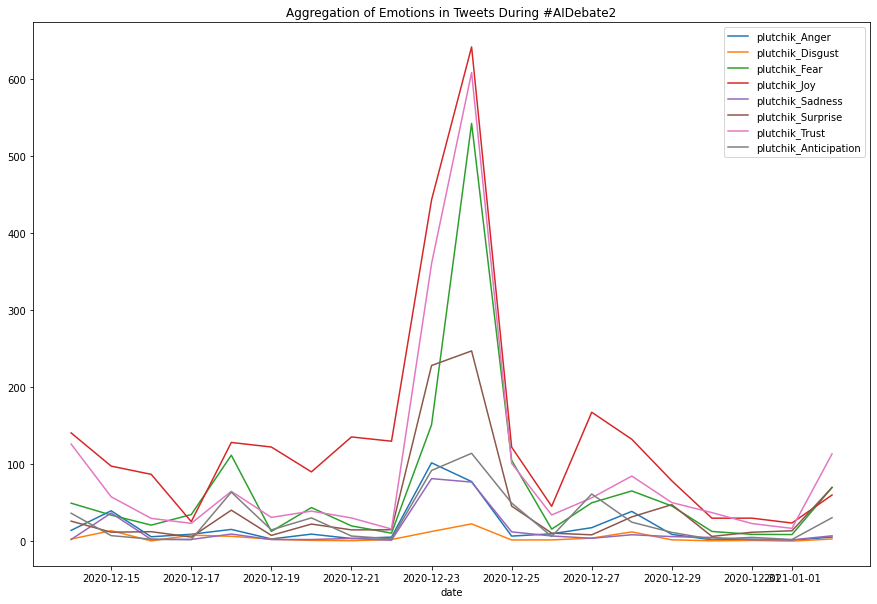

In [ ]:
df_temp = df_new.copy()
df_temp[['plutchik_Anger', 'plutchik_Disgust', 'plutchik_Fear', 'plutchik_Joy',
       'plutchik_Sadness', 'plutchik_Surprise', 'plutchik_Trust',
       'plutchik_Anticipation']] = df_temp[['plutchik_Anger', 'plutchik_Disgust', 'plutchik_Fear', 'plutchik_Joy',
       'plutchik_Sadness', 'plutchik_Surprise', 'plutchik_Trust',
       'plutchik_Anticipation']].multiply(df_temp['likes']+1, axis = 'index')
df2 = df_temp[['date','plutchik_Anger', 'plutchik_Disgust', 'plutchik_Fear', 'plutchik_Joy',
       'plutchik_Sadness', 'plutchik_Surprise', 'plutchik_Trust',
       'plutchik_Anticipation']]
df2.set_index('date')

df3 = df2.groupby(df2['date']).sum()

print(df3)


fig = df3.plot(y=['plutchik_Anger', 'plutchik_Disgust', 'plutchik_Fear', 'plutchik_Joy',
       'plutchik_Sadness', 'plutchik_Surprise', 'plutchik_Trust',
       'plutchik_Anticipation'], figsize=(15,10), 
         title='Aggregation of Emotions in Tweets During #AIDebate2').get_figure()
fig.savefig('PLUTCHIK.png')

poms

            poms_Anger  poms_Depression  ...  poms_Tension  poms_Confusion
date                                     ...                              
2020-12-14   32.782528       136.353923  ...     17.673460       16.356484
2020-12-15   60.888235       107.326722  ...     16.883869       40.748126
2020-12-16   13.570624       126.516730  ...      6.656080        8.060335
2020-12-17   13.362357        45.278826  ...      8.252399        9.202185
2020-12-18   81.792045       146.545656  ...     98.504160       63.068766
2020-12-19    4.941252       141.506008  ...      6.720419        7.339179
2020-12-20   32.179441       133.383702  ...     38.128243       18.143242
2020-12-21    6.978377       168.924013  ...     16.358874        8.297488
2020-12-22    5.228068       130.132526  ...     12.280062        4.790270
2020-12-23  111.081553       565.538840  ...    151.553540      435.612795
2020-12-24  238.715172       816.475893  ...    553.089245      333.773535
2020-12-25   19.262102   

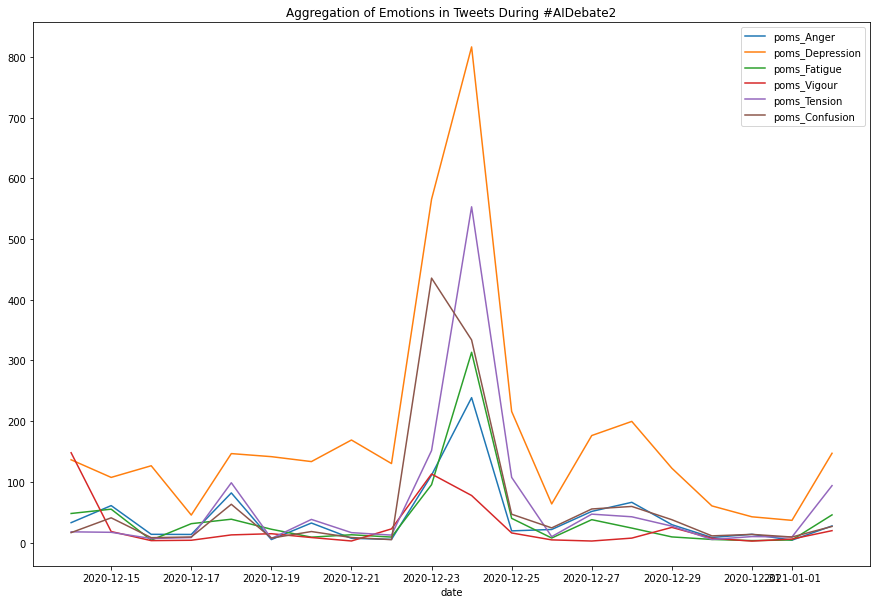

In [ ]:
df_temp = df_new.copy()
df_temp[['poms_Anger', 'poms_Depression',
       'poms_Fatigue', 'poms_Vigour', 'poms_Tension', 'poms_Confusion']] = df_temp[['poms_Anger', 'poms_Depression',
       'poms_Fatigue', 'poms_Vigour', 'poms_Tension', 'poms_Confusion']].multiply(df_temp['likes']+1, axis = 'index')
df2 = df_temp[['date','poms_Anger', 'poms_Depression',
       'poms_Fatigue', 'poms_Vigour', 'poms_Tension', 'poms_Confusion']]
df2.set_index('date')

df3 = df2.groupby(df2['date']).sum()

print(df3)


fig = df3.plot(y=['poms_Anger', 'poms_Depression',
       'poms_Fatigue', 'poms_Vigour', 'poms_Tension', 'poms_Confusion'], figsize=(15,10), 
         title='Aggregation of Emotions in Tweets During #AIDebate2').get_figure()
fig.savefig('POMS.png')

            ekman_Anger  ekman_Disgust  ...  ekman_Sadness  ekman_Surprise
date                                    ...                               
2020-12-14     0.031130   1.388083e-03  ...       0.003310        0.024433
2020-12-15     0.031203   6.124381e-03  ...       0.029208        0.118822
2020-12-17     0.618672   1.176341e-01  ...       0.080541        0.039471
2020-12-18     0.213165   4.072265e-02  ...       0.052897        0.130431
2020-12-19     0.766206   3.903677e+00  ...       0.162443        2.591083
2020-12-20     0.058939   3.002829e-01  ...       0.012496        0.199314
2020-12-21     1.120635   1.087214e-01  ...       0.087887        1.154291
2020-12-23    96.999070   3.699015e+00  ...      41.562878       98.602055
2020-12-24    11.612239   7.249866e+00  ...       6.308076       15.272935
2020-12-25     3.398720   6.816132e-01  ...       1.753130        8.554075
2020-12-26     0.045756   3.761934e-03  ...       0.004447        0.339428
2020-12-27     0.619463  

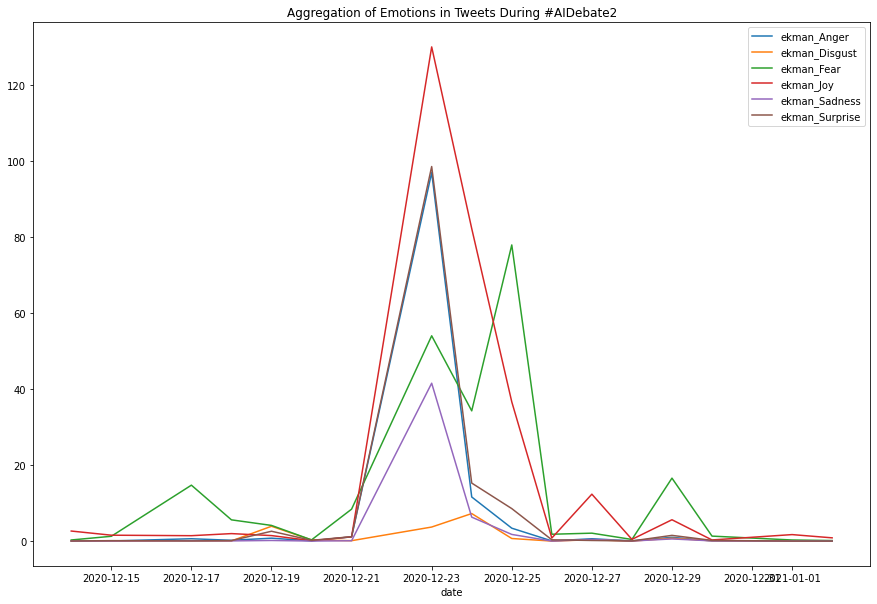

In [ ]:
df_temp = df_new.copy()
df_temp = df_temp[df_temp['text'].str.lower().str.contains('symbolic')]
df_temp[['ekman_Anger', 'ekman_Disgust', 'ekman_Fear', 'ekman_Joy', 'ekman_Sadness', 'ekman_Surprise']] = df_new[['ekman_Anger', 'ekman_Disgust', 'ekman_Fear', 'ekman_Joy', 'ekman_Sadness', 'ekman_Surprise']].multiply(df_temp['likes']+1, axis = 'index')
df2 = df_temp[['date','ekman_Anger',
 'ekman_Disgust',
 'ekman_Fear',
 'ekman_Joy',
 'ekman_Sadness',
 'ekman_Surprise']]
df2.set_index('date')

df3 = df2.groupby(df2['date']).sum()

print(df3)


fig = df3.plot(y=['ekman_Anger',
 'ekman_Disgust',
 'ekman_Fear',
 'ekman_Joy',
 'ekman_Sadness',
 'ekman_Surprise'], figsize=(15,10), 
         title='Aggregation of Emotions in Tweets During #AIDebate2').get_figure()
fig.savefig('EKMAN_symbolic.png')


            ekman_Anger  ekman_Disgust  ...  ekman_Sadness  ekman_Surprise
date                                    ...                               
2020-12-14     0.389577       0.242260  ...       0.329643        0.848476
2020-12-15     0.229947       0.256570  ...       0.056212        0.052984
2020-12-17     0.124253       0.000599  ...       0.013643        0.000835
2020-12-18     6.012062       0.601112  ...       2.193701       16.039037
2020-12-20     0.161028       0.009516  ...       0.918030       34.487042
2020-12-21     0.612596       0.032649  ...       0.860300        2.355042
2020-12-22     0.150556       0.005740  ...       0.271874        0.380071
2020-12-23     4.925932       0.567798  ...       1.497267        5.833287
2020-12-24     2.611431       1.491988  ...       1.101382        2.221790
2020-12-25     0.132587       0.019946  ...       0.045624        3.829574
2020-12-26     0.049472       0.015816  ...       0.056065        0.756657
2020-12-27     9.917669  

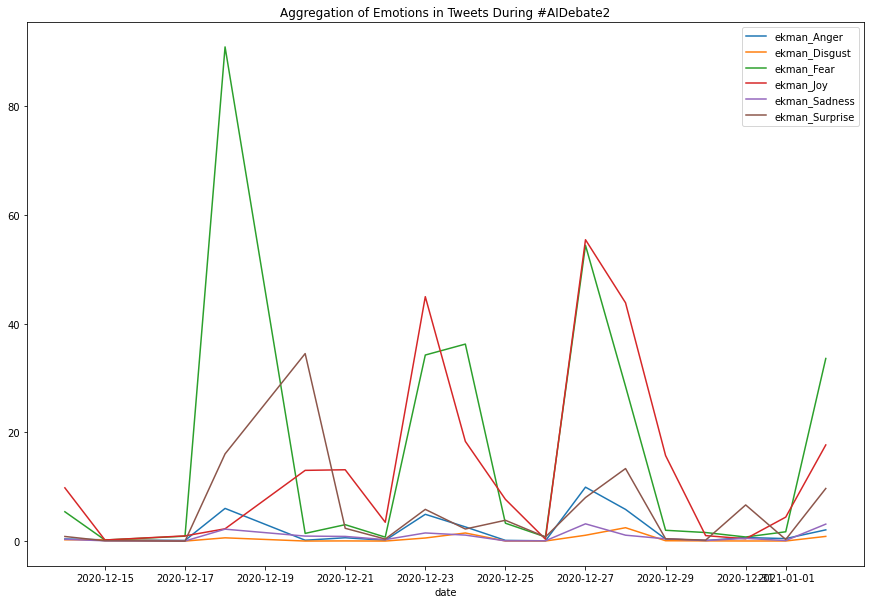

In [ ]:
df_temp = df_new.copy()
df_temp = df_temp[df_temp['text'].str.lower().str.contains('deep')]
df_temp[['ekman_Anger', 'ekman_Disgust', 'ekman_Fear', 'ekman_Joy', 'ekman_Sadness', 'ekman_Surprise']] = df_new[['ekman_Anger', 'ekman_Disgust', 'ekman_Fear', 'ekman_Joy', 'ekman_Sadness', 'ekman_Surprise']].multiply(df_temp['likes']+1, axis = 'index')
df2 = df_temp[['date','ekman_Anger',
 'ekman_Disgust',
 'ekman_Fear',
 'ekman_Joy',
 'ekman_Sadness',
 'ekman_Surprise']]
df2.set_index('date')

df3 = df2.groupby(df2['date']).sum()

print(df3)


fig = df3.plot(y=['ekman_Anger',
 'ekman_Disgust',
 'ekman_Fear',
 'ekman_Joy',
 'ekman_Sadness',
 'ekman_Surprise'], figsize=(15,10), 
         title='Aggregation of Emotions in Tweets During #AIDebate2').get_figure()
fig.savefig('EKMAN_deeplearning.png')


In [ ]:
pip install pygal_maps_world

     |████████████████████████████████| 276kB 7.5MB/s 
     |████████████████████████████████| 133kB 8.5MB/s 
  Created wheel for pygal-maps-world: filename=pygal_maps_world-1.0.2-cp36-none-any.whl size=278559 sha256=d1d8ab47602095aa6a84015fbb32362329e7439a7a598ef69ba2dbf317063c60
  Stored in directory: /root/.cache/pip/wheels/1b/82/f6/815c1f00c72b9e031d44a883cf5d83f258e8f57b415f7a512e
Successfully built pygal-maps-world


In [ ]:
from pygal_maps_world.maps import World
worldall = {a.lower():b for a,b in z.items()}
# create a world map 
worldmap =  World() 
  
# set the title of the map 
worldmap.title = 'Countries of the included tweets'
  
# adding the countries 
worldmap.add( "Tweets", worldall) 
  
# save into the file 
worldmap.render_to_file('abc.svg') 
  
print("Success") 

Success
